In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
"""
Input: list of txt files - WA,FB,TW
Output: data - list containing appended data from all three files along with msg no: format - [[msgno,Word,Lang,Token]]
        msgsCnt - Total no of msgs
        cache - 3 index no's where WA,FB,TW data end
"""
def EditDataset(paths):
    msgsCnt=1
    data = []
    cache = ()
    numwords = 0
    i=-1
    for path in paths:
        f = open(path)
        while(True):
            line = f.readline()
            if line=="\n":
                msgsCnt += 1
                continue
            if line=="":
                break
            lin = [msgsCnt] + line.split()
            data.append(lin)
            numwords += 1
            if numwords == 50:
                numwords = 0
                msgsCnt += 1
            i += 1
        cache = cache + (i,)
    return data,msgsCnt,cache

en_hi_te_data,_,cache = EditDataset(["WA_HI_EN_CR.txt", "FB_HI_EN_CR.txt", "TWT_HI_EN_CR.txt","wa.txt","fb.txt","tw.txt"])
en_te_data,_,_ = EditDataset(["wa.txt","fb.txt","tw.txt"])
en_hi_data,_,_ = EditDataset(["WA_HI_EN_CR.txt", "FB_HI_EN_CR.txt", "TWT_HI_EN_CR.txt"])
print(cache)

(3217, 23832, 41143, 48564, 58601, 70614)


In [ ]:
def CreateFile(data):
    (data1,data2,data3) = data
    df1 = pd.DataFrame(data1,columns=["MsgNo", "Word", "Tag", "Token"])
    df2 = pd.DataFrame(data2,columns=["MsgNo", "Word", "Tag", "Token"])
    df3 = pd.DataFrame(data3,columns=["MsgNo", "Word", "Tag", "Token"])
    
    if os.path.exists("en_hi_te.csv"):
        os.remove("en_hi_te.csv")
    df1.to_csv("en_hi_te.csv",index=False)

    if os.path.exists("en_te.csv"):
        os.remove("en_te.csv")
    df2.to_csv("en_te.csv",index=False)
    
    if os.path.exists("en_hi.csv"):
        os.remove("en_hi.csv")
    df3.to_csv("en_hi.csv",index=False)

    return

CreateFile((en_hi_te_data, en_te_data, en_hi_data))

In [ ]:
data = pd.read_csv("en_hi_te.csv")
data

,MsgNo,Word,Tag,Token
0,1,Happy,en,G_J
1,1,birthday,en,G_N
2,1,di,hi,G_V
3,1,..,univ,G_X
4,2,Live,en,G_V
...,...,...,...,...
70610,6022,Station,en,G_N
70611,6022,aipoddi,te,G_N
70612,6022,roooo,te,G_X
70613,6022,#SardaarGabbarSingh,univ,#


In [ ]:
# drop rows if word is null
data.dropna(how="any",inplace=True)

In [ ]:
print("total unique words in corpus:",data["Word"].nunique())
print("total unique langs in corpus:",data["Tag"].nunique())

total unique words in corpus: 17762
total unique langs in corpus: 8


In [ ]:
data.groupby('Tag').count()

,MsgNo,Word,Token
Tag,,,
acro,353,353,353
en,26125,26125,26125
hi,15171,15171,15171
mixed,11,11,11
ne,1847,1847,1847
te,8754,8754,8754
undef,4,4,4
univ,18068,18068,18068


In [ ]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)
tags = list(set(data["Tag"].values))
num_tags = len(tags)
print(words,"\n",tags,"\n",num_words,num_tags)

['✊✊✊', 'quake', 'observe', 'sepe', 'KAHA', 'arupu', '@QuidEAzam1948', 'anti', 'anyway', 'dui', 'things', '1999', 'cousin', 'tweeter', 'kaam', 'Pulla', '@Divyanka241', 'Dhoni', 'hashtag', 'pack', 'graphs', '@Tenali_RK', 'itchendi', 'aandhiyo', 'goal', 'genus', 'Bhemili', 'kra', 'bachy', 'Deepti', 'flash', 'Seriously', 'Krte', 'tujhe', 'Gunjaish', 'banaye', '@sreeja_pk', 'rhi', 'sacrifice', 'Rana', 'following', ':P', 'Motham', 'baatein', 'inspired', 'puli', 'indulge', 'sea\\', 'benchod', 'apney', 'insti', 'polls', 'brahmi', 'R', 'screen', 'lekar', 'twitter.com/naveenrsingh9/', 'perugu', 'sharmate', 'Ding', 'baith', '@JahanurAamir', '@TwistedMind_1', 'maregi', 'chii', 'load', 'Siddharth', 'Gurur', 'kmlesh', '@MdRizwan4', 'kaney', 'Favourite', 'cities', 'Shamil', 'chalega😑', 'deleted', '@Spoof_boy', 'aqeedat', 'aadakunte', 'Pu', 'chittakottadu', 'though', '@ItzJatt', 'Meko', 'dosto', 'leva', 'Mass', 'pinch', '#IGuess', 'Wow', '2nd', '@milisilichilli', 'rkhi', '#319', 'Bye', 'eroju', 'mark

In [ ]:
func = lambda l: [(word,tag,tok) for word,tag,tok in zip(l["Word"].values,l["Tag"].values,l["Token"].values)]
groupedData = data.groupby("MsgNo").apply(func)
messages = [m for m in groupedData]
messages[0]

[('Happy', 'en', 'G_J'),
 ('birthday', 'en', 'G_N'),
 ('di', 'hi', 'G_V'),
 ('..', 'univ', 'G_X')]

In [ ]:
word_to_idx = {w : i for i,w in enumerate(words)}
idx_to_word = {i: w for i,w in enumerate(words)}
tag_to_idx = {t : i for i,t in enumerate(tags)}
idx_to_tag = {i : t for i,t in enumerate(tags)}
print(word_to_idx,"\n",idx_to_word,"\n",tag_to_idx)

{'✊✊✊': 0, 'quake': 1, 'observe': 2, 'sepe': 3, 'KAHA': 4, 'arupu': 5, '@QuidEAzam1948': 6, 'anti': 7, 'anyway': 8, 'dui': 9, 'things': 10, '1999': 11, 'cousin': 12, 'tweeter': 13, 'kaam': 14, 'Pulla': 15, '@Divyanka241': 16, 'Dhoni': 17, 'hashtag': 18, 'pack': 19, 'graphs': 20, '@Tenali_RK': 21, 'itchendi': 22, 'aandhiyo': 23, 'goal': 24, 'genus': 25, 'Bhemili': 26, 'kra': 27, 'bachy': 28, 'Deepti': 29, 'flash': 30, 'Seriously': 31, 'Krte': 32, 'tujhe': 33, 'Gunjaish': 34, 'banaye': 35, '@sreeja_pk': 36, 'rhi': 37, 'sacrifice': 38, 'Rana': 39, 'following': 40, ':P': 41, 'Motham': 42, 'baatein': 43, 'inspired': 44, 'puli': 45, 'indulge': 46, 'sea\\': 47, 'benchod': 48, 'apney': 49, 'insti': 50, 'polls': 51, 'brahmi': 52, 'R': 53, 'screen': 54, 'lekar': 55, 'twitter.com/naveenrsingh9/': 56, 'perugu': 57, 'sharmate': 58, 'Ding': 59, 'baith': 60, '@JahanurAamir': 61, '@TwistedMind_1': 62, 'maregi': 63, 'chii': 64, 'load': 65, 'Siddharth': 66, 'Gurur': 67, 'kmlesh': 68, '@MdRizwan4': 69, '

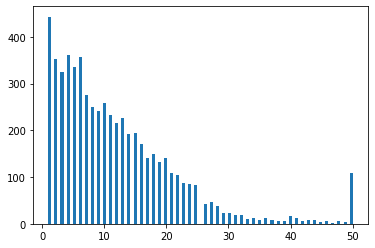

In [ ]:
plt.hist([len(mess) for mess in messages],bins=100)
plt.show()

In [ ]:
max([len(mess) for mess in messages])

50

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50
x = [[word_to_idx[w[0]] for w in m] for m in messages]
x = pad_sequences(maxlen=max_len, sequences=x, padding="post", value=num_words-1)

y = [[tag_to_idx[w[1]] for w in m] for m in messages]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag_to_idx["undef"])
print([[idx_to_word[i] for i in l]for l in x])
print(x,x.shape,"\n",y,y.shape)

[['Happy', 'birthday', 'di', '..', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD'], ['Live', 'long', '!', 'Ding', 'dong', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD', 'ENDPAD'], ['Thnk', 'u', '

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, TimeDistributed, SpatialDropout1D, Bidirectional
from keras.utils import to_categorical

input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()


# input = Input(shape=(max_len,))
# out = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input)
# out = Dropout(0.2)(out)
# out = LSTM(units=100,return_sequences=True)(out)
# # out = LSTM(units=100,return_sequences=True)(out)
# # out = Dropout(0.2)(out)
# out = Dense(num_tags,activation='softmax')(out)
# model = Model(inputs=input, outputs=out)
# model.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 50)]              0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 50, 50)            888150    
_________________________________________________________________
spatial_dropout1d_9 (Spatial (None, 50, 50)            0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 50, 200)           120800    
_________________________________________________________________
time_distributed_9 (TimeDist (None, 50, 8)             1608      
Total params: 1,010,558
Trainable params: 1,010,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
print(y_train[0],y_train.shape,"\n",y_train_oh[0],y_train_oh.shape)
print(y_test[0],y_test.shape,"\n",y_test_oh[0],y_test_oh.shape)

[3 3 1 3 3 3 3 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6] (4139, 50) 
 [[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 

In [ ]:
# !pip install livelossplot

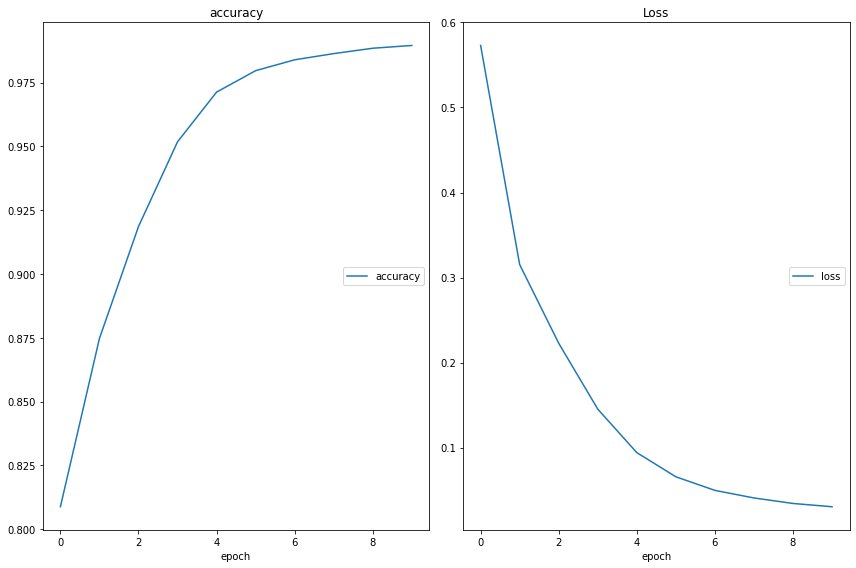

accuracy
	accuracy         	 (min:    0.809, max:    0.990, cur:    0.990)
Loss
	loss             	 (min:    0.030, max:    0.573, cur:    0.030)
130/130 [==============================] - 24s 185ms/step - loss: 0.0305 - accuracy: 0.9896


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKeras

chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesKeras(), chkpt, early_stopping]

model.fit(
    x=x_train,
    y=y_train_oh,
    # validation_data=(x_test,y_test_oh),
    batch_size=32, 
    epochs=10,
    callbacks=callbacks,
    verbose=1
)




In [ ]:
model.evaluate(x_test,y_test_oh)

56/56 [==============================] - 1s 26ms/step - loss: 0.1664 - accuracy: 0.9517


[0.16640444099903107, 0.951702356338501]

In [ ]:
y_pred_oh = model.predict(x_test)
y_pred = np.argmax(y_pred_oh,axis=-1)
y_pred = [[idx_to_tag[idx] for idx in pred]for pred in y_pred]
y_test = [[idx_to_tag[idx] for idx in test]for test in y_test]
print(y_pred_oh[0],"\n",y_pred[0],"\n",y_test[0])
print(metrics.flat_classification_report(y_true=y_test, y_pred = y_pred, labels = tags))

[[1.86263630e-03 1.31600767e-01 5.92155218e-01 4.30280808e-03
  7.06393048e-02 2.09036022e-02 2.22635176e-03 1.76309377e-01]
 [5.16776963e-05 1.36542169e-03 1.91211607e-03 6.74892419e-07
  5.61596546e-03 1.00678252e-03 1.08377414e-03 9.88963485e-01]
 [2.63251677e-05 7.41660333e-05 2.12146476e-01 5.14326246e-07
  2.05633603e-03 5.47466159e-04 2.37053522e-04 7.84911692e-01]
 [1.06136664e-04 5.81284519e-04 3.90742011e-02 1.14633003e-04
  4.37440909e-02 3.90725443e-03 9.68644570e-04 9.11503851e-01]
 [1.13281803e-05 6.25899047e-05 4.04399959e-03 1.17303969e-07
  4.63165296e-03 4.21419507e-04 8.54326040e-03 9.82285738e-01]
 [2.01887233e-05 9.63467523e-04 1.81698613e-03 1.29707280e-06
  1.98881757e-02 9.00838233e-04 1.28578961e-01 8.47830057e-01]
 [1.74431154e-08 2.02948104e-05 6.00446004e-09 1.25966581e-11
  1.36807594e-05 4.25465430e-07 9.99538422e-01 4.27132123e-04]
 [8.14778023e-10 4.91501305e-06 6.20117360e-11 9.59400541e-14
  1.18295566e-06 3.39104673e-08 9.99953151e-01 4.06883519e-05]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       mixed       0.00      0.00      0.00         2
          en       0.79      0.91      0.84      8041
        univ       0.76      0.75      0.76      5362
          hi       0.89      0.79      0.83      4312
          ne       0.55      0.42      0.48       572
        acro       0.91      0.25      0.39       120
       undef       1.00      1.00      1.00     67802
          te       0.81      0.65      0.72      2489

    accuracy                           0.95     88700
   macro avg       0.71      0.60      0.63     88700
weighted avg       0.95      0.95      0.95     88700



# CRF classifier

In [ ]:
# !pip install sklearn_crfsuite

In [ ]:
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from collections import Counter

### Feature Extraction

In [ ]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][2]
    
    features = {
        'bias': 1.0, 
        'word.lower()': word.lower(), 
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True
    return features
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]
def sent2tags(sent):
    return [tag for word,tag,token in sent]

### Train test split

In [ ]:
X = [sent2features(m) for m in messages]
Y = [sent2tags(m) for m in messages]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X[0],"\n",y[0])

[{'bias': 1.0, 'word.lower()': 'happy', 'word[-3:]': 'ppy', 'word[-2:]': 'py', 'word.isupper()': False, 'word.istitle()': True, 'word.isdigit()': False, 'postag': 'G_J', 'postag[:2]': 'G_', 'BOS': True, '+1:word.lower()': 'birthday', '+1:word.istitle()': False, '+1:word.isupper()': False, '+1:postag': 'en', '+1:postag[:2]': 'en'}, {'bias': 1.0, 'word.lower()': 'birthday', 'word[-3:]': 'day', 'word[-2:]': 'ay', 'word.isupper()': False, 'word.istitle()': False, 'word.isdigit()': False, 'postag': 'G_N', 'postag[:2]': 'G_', '-1:word.lower()': 'happy', '-1:word.istitle()': True, '-1:word.isupper()': False, '-1:postag': 'en', '-1:postag[:2]': 'en', '+1:word.lower()': 'di', '+1:word.istitle()': False, '+1:word.isupper()': False, '+1:postag': 'hi', '+1:postag[:2]': 'hi'}, {'bias': 1.0, 'word.lower()': 'di', 'word[-3:]': 'di', 'word[-2:]': 'di', 'word.isupper()': False, 'word.istitle()': False, 'word.isdigit()': False, 'postag': 'G_V', 'postag[:2]': 'G_', '-1:word.lower()': 'birthday', '-1:word

### Training

In [ ]:
crf = sklearn_crfsuite.CRF(
    algorithm = 'lbfgs',
    c1 = 0.1,
    c2 = 0.1,
    max_iterations = 100,
    all_possible_transitions = True
)

crf.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CRF(algorithm='lbfgs', all_possible_states=None, all_possible_transitions=True,
    averaging=None, c=None, c1=0.1, c2=0.1, calibration_candidates=None,
    calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
    calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
    gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
    max_linesearch=None, min_freq=None, model_filename=None, num_memories=None,
    pa_type=None, period=None, trainer_cls=None, variance=None, verbose=False)

### Evaluation

In [ ]:
Y_pred = crf.predict(X_test)
print(Y_pred,"\n",Y_test)
print(metrics.flat_classification_report(y_true=Y_test, y_pred = Y_pred, labels = tags))

[['en', 'en', 'te', 'te', 'univ', 'univ'], ['univ', 'univ', 'univ', 'univ', 'univ', 'te'], ['en', 'en'], ['te', 'te', 'univ'], ['en', 'univ', 'te', 'en', 'univ'], ['hi', 'en', 'univ', 'univ'], ['univ', 'univ', 'hi', 'hi', 'hi', 'en', 'en', 'en', 'en', 'en', 'hi', 'hi'], ['en', 'univ', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'hi', 'univ', 'univ', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'univ', 'en', 'en', 'en', 'en', 'en', 'en', 'univ', 'univ', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'ne', 'univ', 'en'], ['univ', 'univ', 'te', 'univ', 'univ', 'en', 'en', 'te', 'univ', 'univ', 'univ', 'univ', 'te', 'te', 'te', 'te'], ['univ', 'univ', 'en', 'en'], ['hi', 'hi'], ['ne', 'en', 'en', 'hi', 'hi', 'hi', 'en', 'hi', 'hi', 'hi', 'hi', 'hi'], ['univ', 'univ', 'univ', 'hi', 'en'], ['hi', 'hi', 'hi'], ['hi', 'hi', 'univ', 'hi', 'hi', 'hi', 'hi', 'hi'], ['te', 'te', 'univ', 'te', 'te', 'te', 'en', 'te', 'en'], ['te', 'te', 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**english telugu**